In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.proportion import proportions_ztest #one sample z test
from scipy.stats import ttest_1samp #one sample t-test
from scipy.stats import ttest_ind #two sample t-test for unequal variances
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
 

import warnings

warnings.filterwarnings("ignore")

In [89]:
df=pd.read_csv(r"/home/adarsh/Downloads/train.csv")

In [90]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [91]:
df.shape


(550068, 12)

In [92]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [93]:
label=LabelEncoder()

In [94]:
df["User_ID"]=label.fit_transform(df["User_ID"])
print("User_ID",label.classes_)
df["Product_ID"]=label.fit_transform(df["Product_ID"])
print("Product_ID",label.classes_)


df["Gender"]=label.fit_transform(df["Gender"])
print("Gender",label.classes_)

df["Age"]=label.fit_transform(df["Age"])
print("Age",label.classes_)

df["City_Category"]=label.fit_transform(df["City_Category"])
print("City_Category",label.classes_)


User_ID [1000001 1000002 1000003 ... 1006038 1006039 1006040]
Product_ID ['P00000142' 'P00000242' 'P00000342' ... 'P0099742' 'P0099842' 'P0099942']
Gender ['F' 'M']
Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
City_Category ['A' 'B' 'C']


In [95]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,NaN,NaN,8370
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,852,0,0,10,0,2,0,12,NaN,NaN,1422
3,0,828,0,0,10,0,2,0,12,14.0,NaN,1057
4,1,2734,1,6,16,2,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,5883,3567,1,5,13,1,1,1,20,NaN,NaN,368
550064,5885,3568,0,2,1,2,3,0,20,NaN,NaN,371
550065,5886,3568,0,2,15,1,4+,1,20,NaN,NaN,137
550066,5888,3568,0,6,1,2,2,0,20,NaN,NaN,365


In [96]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 50.4+ MB


In [98]:
df.Stay_In_Current_City_Years=df.Stay_In_Current_City_Years.replace('4+','4')

In [99]:
df.Stay_In_Current_City_Years=df.Stay_In_Current_City_Years.astype(int)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 50.4 MB


In [101]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [102]:
df.Stay_In_Current_City_Years.value_counts()

Stay_In_Current_City_Years
1    193821
2    101838
3     95285
4     84726
0     74398
Name: count, dtype: int64

In [103]:
"""df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mean())
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mean())"""

"df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mean())\ndf['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mean())"

In [104]:
df.dropna(inplace=True)

In [105]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [106]:
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
6,3,1745,1,4,7,1,2,1,1,8.0,17.0,19215
13,4,1355,1,2,20,0,1,1,1,2.0,5.0,15665
14,5,2203,0,5,9,0,1,0,5,8.0,14.0,5378
16,5,3598,0,5,9,0,1,0,2,3.0,4.0,13055
18,6,362,1,3,1,1,1,1,1,14.0,16.0,11788
19,7,2382,1,2,12,2,4,1,1,5.0,15.0,19614
24,7,2909,1,2,12,2,4,1,1,8.0,14.0,11927
28,8,765,1,2,17,2,0,0,5,8.0,14.0,5391
29,9,833,0,3,1,1,4,1,2,4.0,8.0,16352


In [107]:
df.Product_Category_2.unique()

array([ 6.,  8.,  2.,  3., 14.,  5.,  4., 11., 15., 10.,  9., 13., 12.,
       16.])

In [108]:
df.Product_Category_3.unique()

array([14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

In [109]:
df.describe()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000
mean,2956.922258,1471.491683,0.774645,2.455153,8.178886,1.087159,1.861690,0.402839,2.742766,6.896871,12.668243,11658.114980
std,1690.553079,942.668323,0.417817,1.335119,6.487522,0.759824,1.284791,0.490470,2.573969,4.500288,4.125338,5082.287959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1478.000000,745.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,9.000000,7869.000000
50%,3019.000000,1334.000000,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,1.000000,6.000000,14.000000,11756.000000
75%,4367.000000,2106.000000,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,4.000000,10.000000,16.000000,15626.000000
max,5890.000000,3630.000000,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,15.000000,16.000000,18.000000,23959.000000


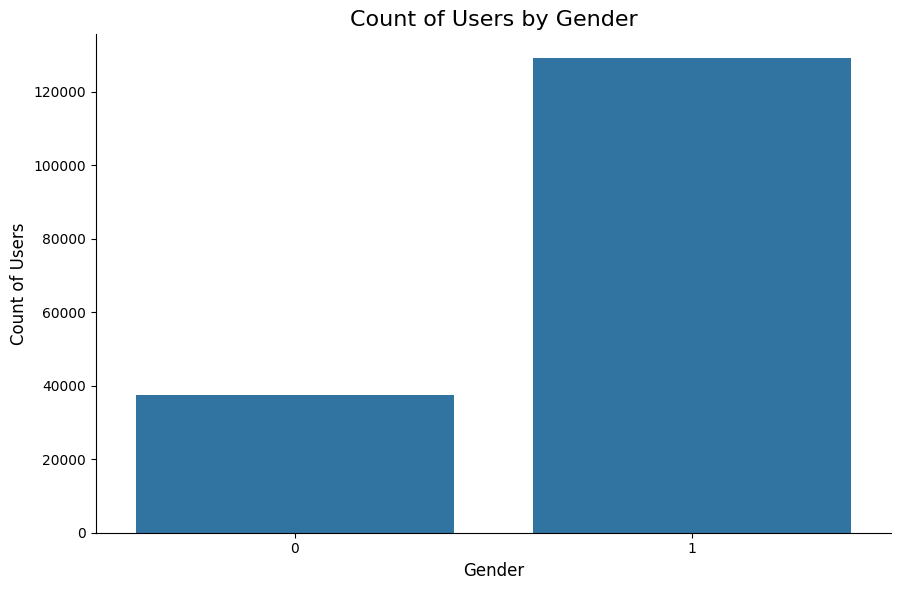

In [110]:
sns.catplot(data=df, x='Gender', kind='count', height=6, aspect=1.5)
plt.title("Count of Users by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count of Users", fontsize=12)
plt.tight_layout()
plt.show()


##### Amongst all the purshases made, the purchases  made by Female are higher as compared to Male

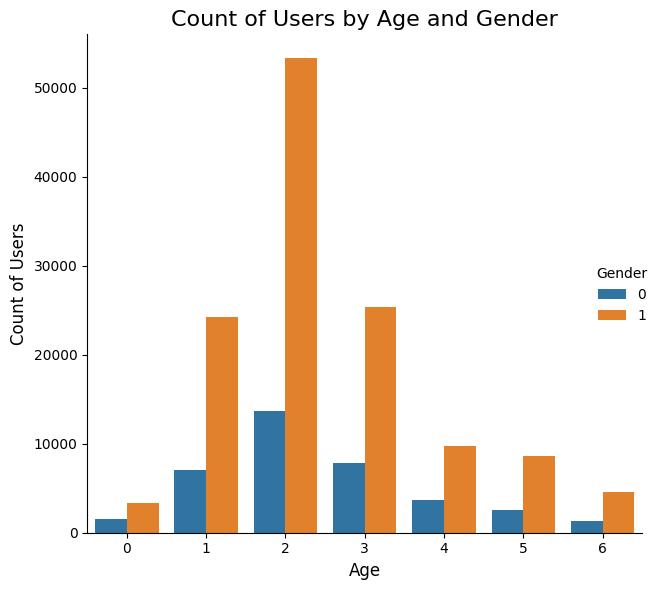

In [111]:
sns.catplot(data=df, x='Age', hue='Gender', kind='count', height=6)
plt.title("Count of Users by Age and Gender", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count of Users", fontsize=12)
plt.tight_layout()
plt.show()


##### Inferences from the Plot:
1. The most frequent purchases came from the females having user ids that belong to age category 4(36-45)
2. The least frequent purchases came from the males of the age category 1(18-25), and females of age category 0(0-17).

In [112]:
# Gender Distribution
gender_dist = df['Gender'].value_counts()
print(gender_dist)

# Marital Status Distribution
marital_dist = df['Marital_Status'].value_counts()
print(marital_dist)


Gender
1    129227
0     37594
Name: count, dtype: int64
Marital_Status
0    99619
1    67202
Name: count, dtype: int64


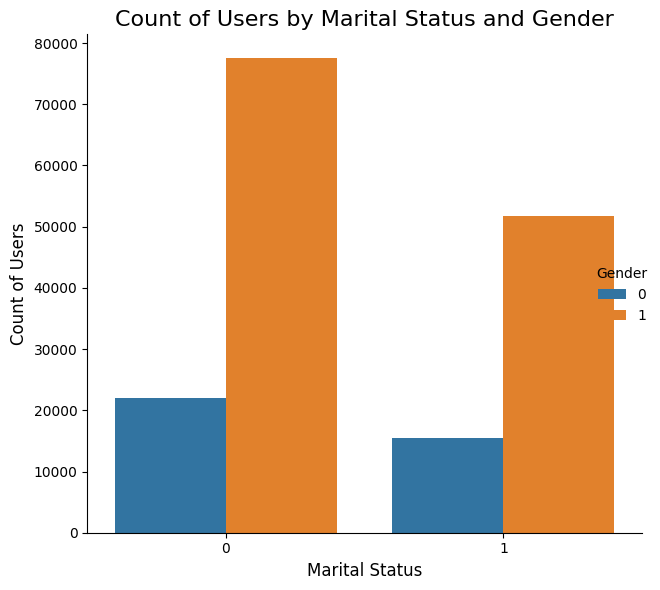

In [113]:
sns.catplot(data=df, x='Marital_Status', hue='Gender', kind='count', height=6)
plt.title("Count of Users by Marital Status and Gender", fontsize=16)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Count of Users", fontsize=12)
plt.tight_layout()
plt.show()


##### The gender ratio in unmarried customers is almost similar, whereas the married customers have a sightly higher number of females in the lot.

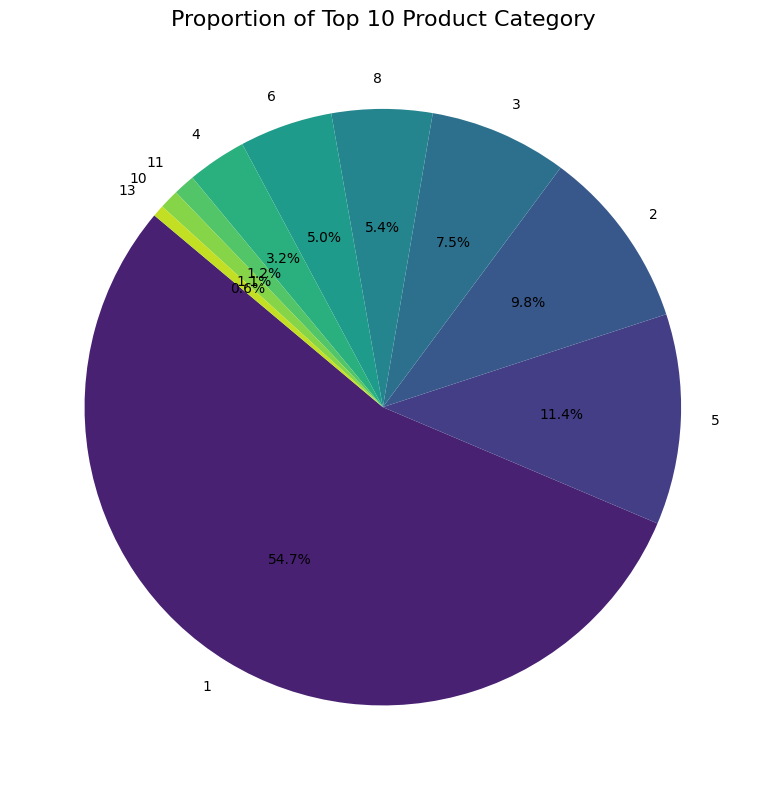

In [114]:


top_categories = df['Product_Category_1'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(top_categories)))

plt.title("Proportion of Top 10 Product Category", fontsize=16)
plt.tight_layout()
plt.show()

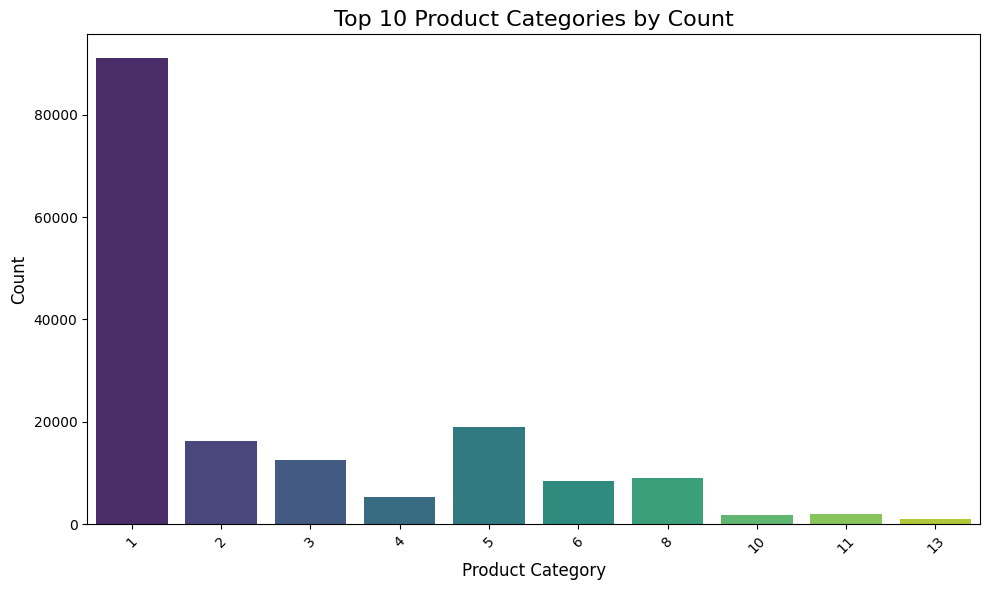

In [115]:
top_categories = df['Product_Category_1'].value_counts().head(10)

# Plotting the top categories
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')

plt.title("Top 10 Product Categories by Count", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Product_category_1 sees a great rise of product category "1" and diminishes with the other products. The other considerable categories are "5", "2", "3", "6","8", etc.

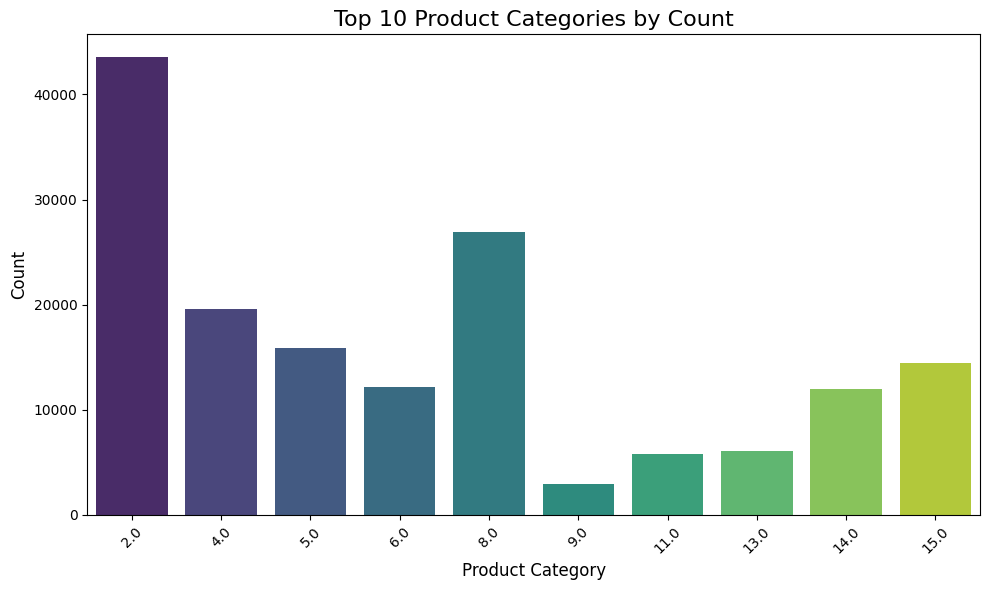

In [116]:
top_categories = df['Product_Category_2'].value_counts().head(10)

# Plotting the top categories
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')

plt.title("Top 10 Product Categories by Count", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Product_Category_2 sees a considerate balance among categories. With category 2 topping the charts, and other considerable categories are 8,4,5,6,14,15,etc.

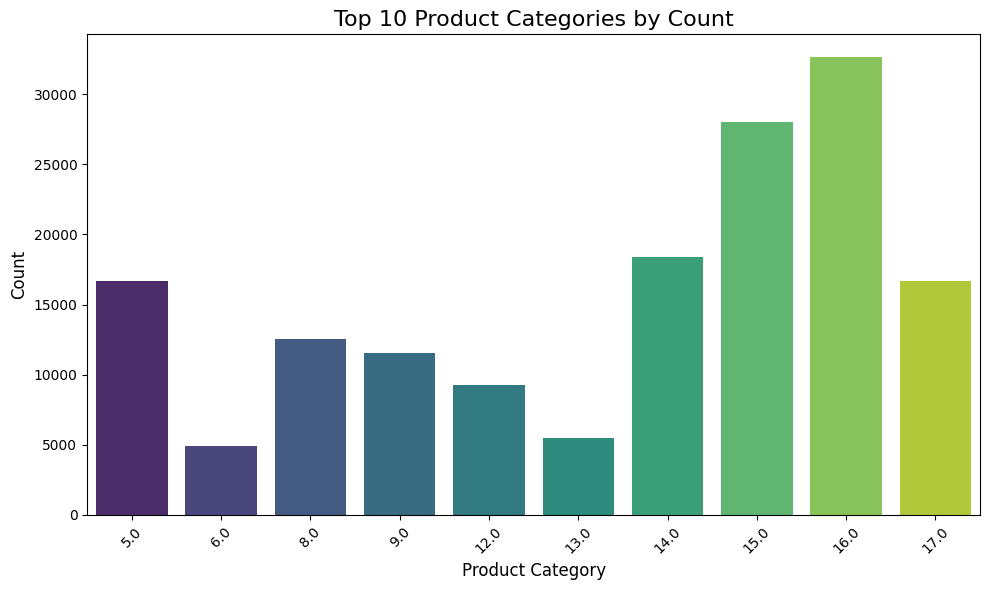

In [117]:
top_categories = df['Product_Category_3'].value_counts().head(10)

# Plotting the top categories
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')

plt.title("Top 10 Product Categories by Count", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- For product_category_3, the balance is towards the end with 16 topping the charts, and other considerable categories are 15, 14, 5, 8, 9, 17, etc.

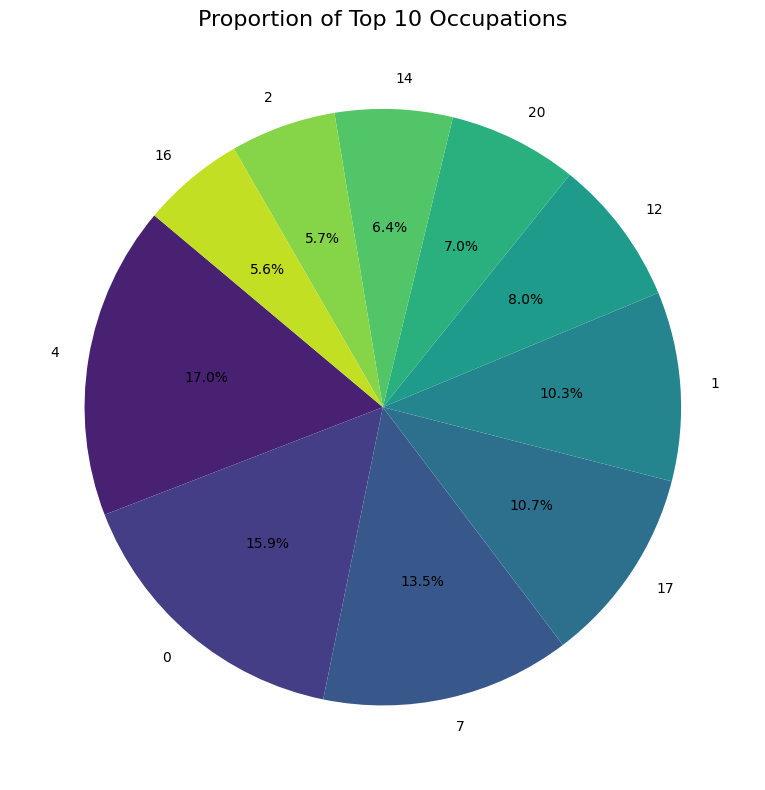

In [118]:
top_categories = df['Occupation'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(top_categories)))

plt.title("Proportion of Top 10 Occupations", fontsize=16)
plt.tight_layout()
plt.show()

- Occupation also sees a constant balance with 4 topping the chart, and other categories in the considerable amount with 0,1,2,7,12,17,20.

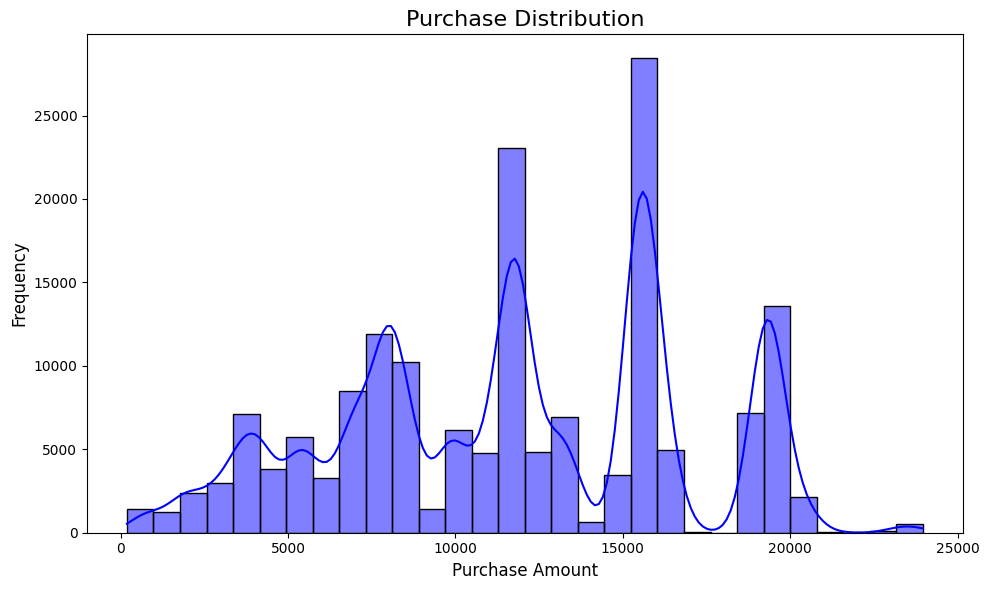

In [119]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], kde=True, bins=30, color='blue')  
plt.title("Purchase Distribution", fontsize=16)
plt.xlabel("Purchase Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

- Purchases is not accumulated in a range, rather varies in different intervals.

In [120]:
corr_spearman = df.corr()
corr_pearson = df.corr(method='pearson')
corr_kendall = df.corr(method='kendall')

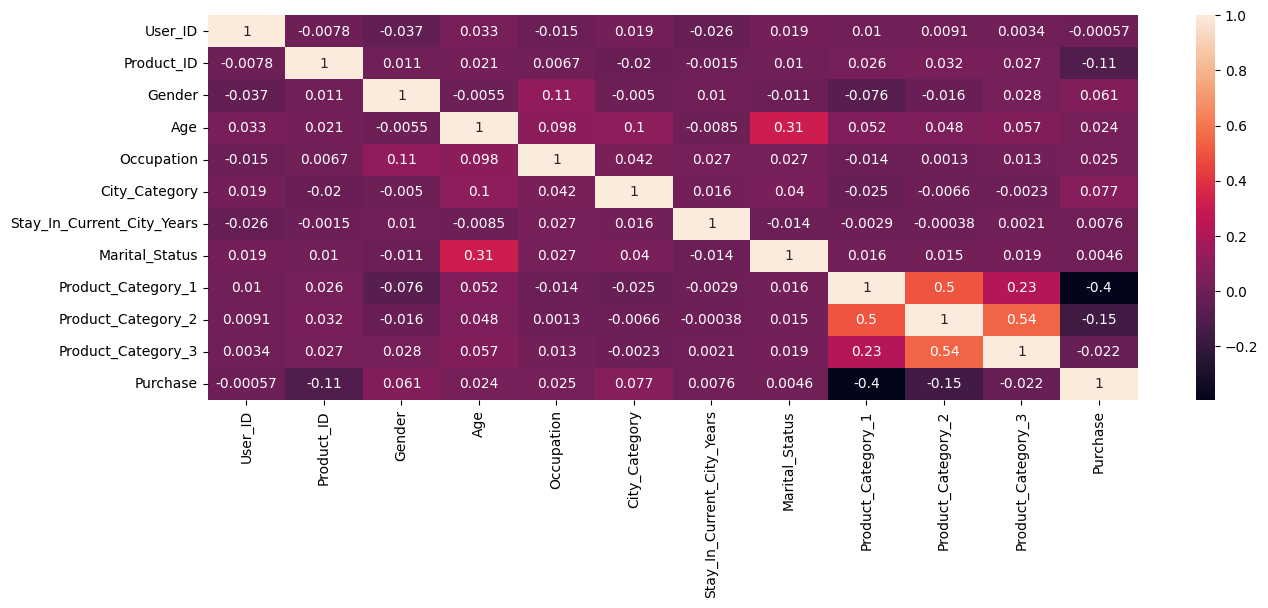

In [121]:
#spearman correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_spearman, annot=True)
plt.show()

<Axes: >

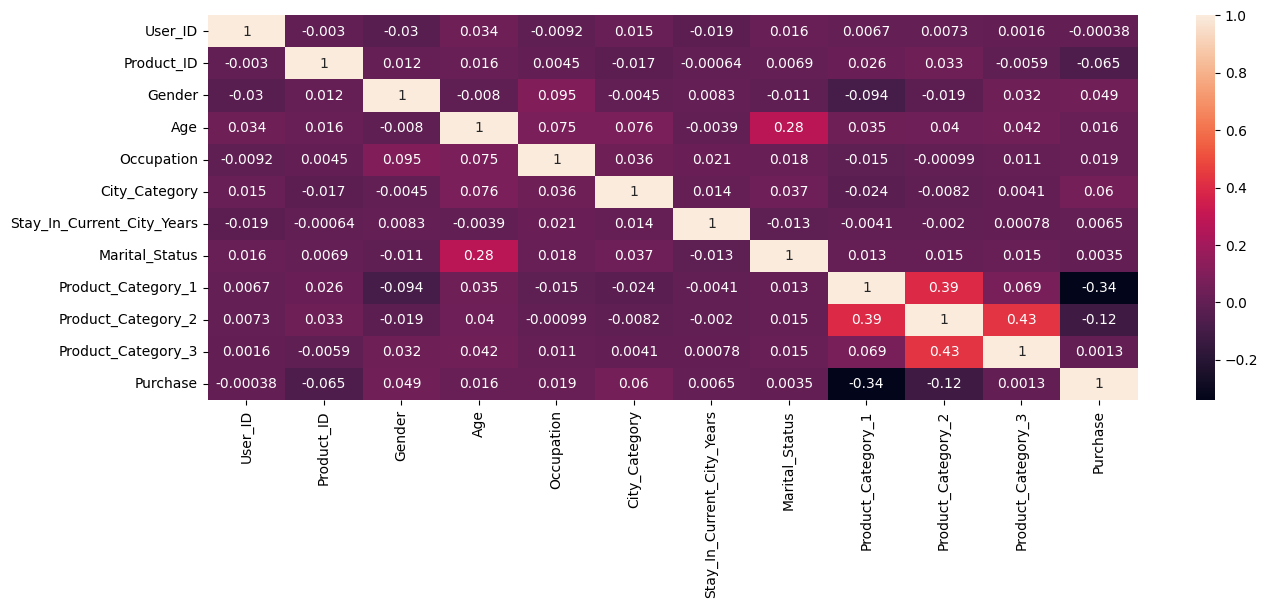

In [122]:
#kendall correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_kendall, annot=True)

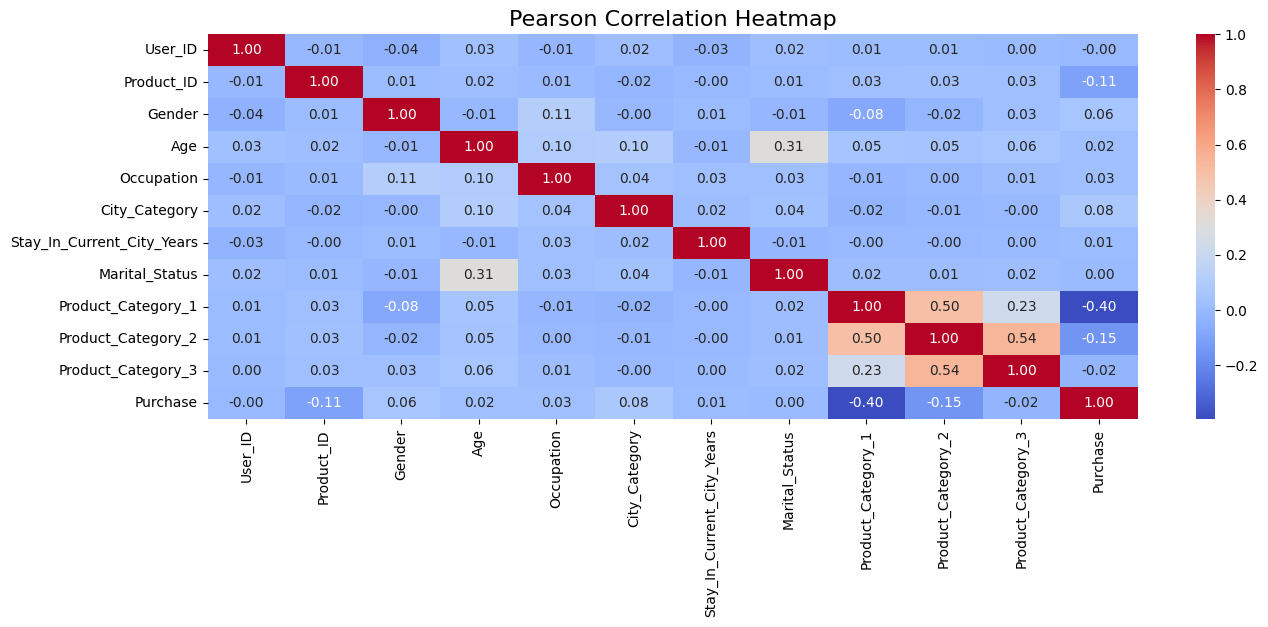

In [123]:
#pearson correlation
plt.figure(figsize=(15, 5))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap", fontsize=16)
plt.show()

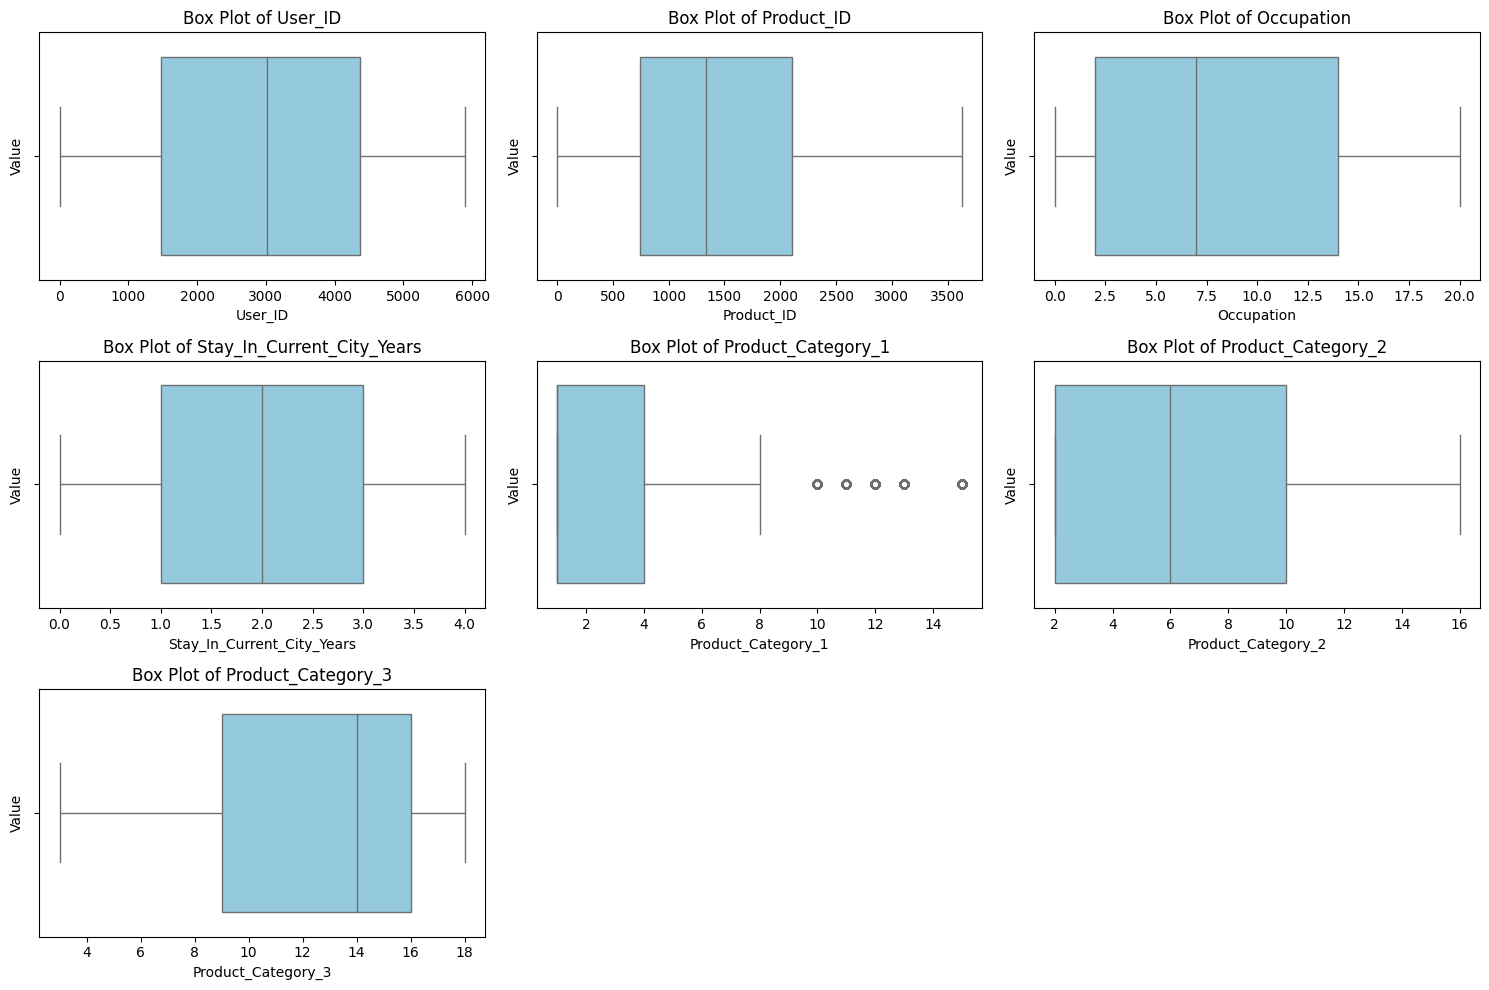

In [124]:
 

# List of numerical columns
numerical_columns = ['User_ID', 'Product_ID', 'Occupation', 'Stay_In_Current_City_Years', 
                     'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=column, color='skyblue')
    plt.title(f'Box Plot of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Value', fontsize=10)
plt.tight_layout()
plt.show()


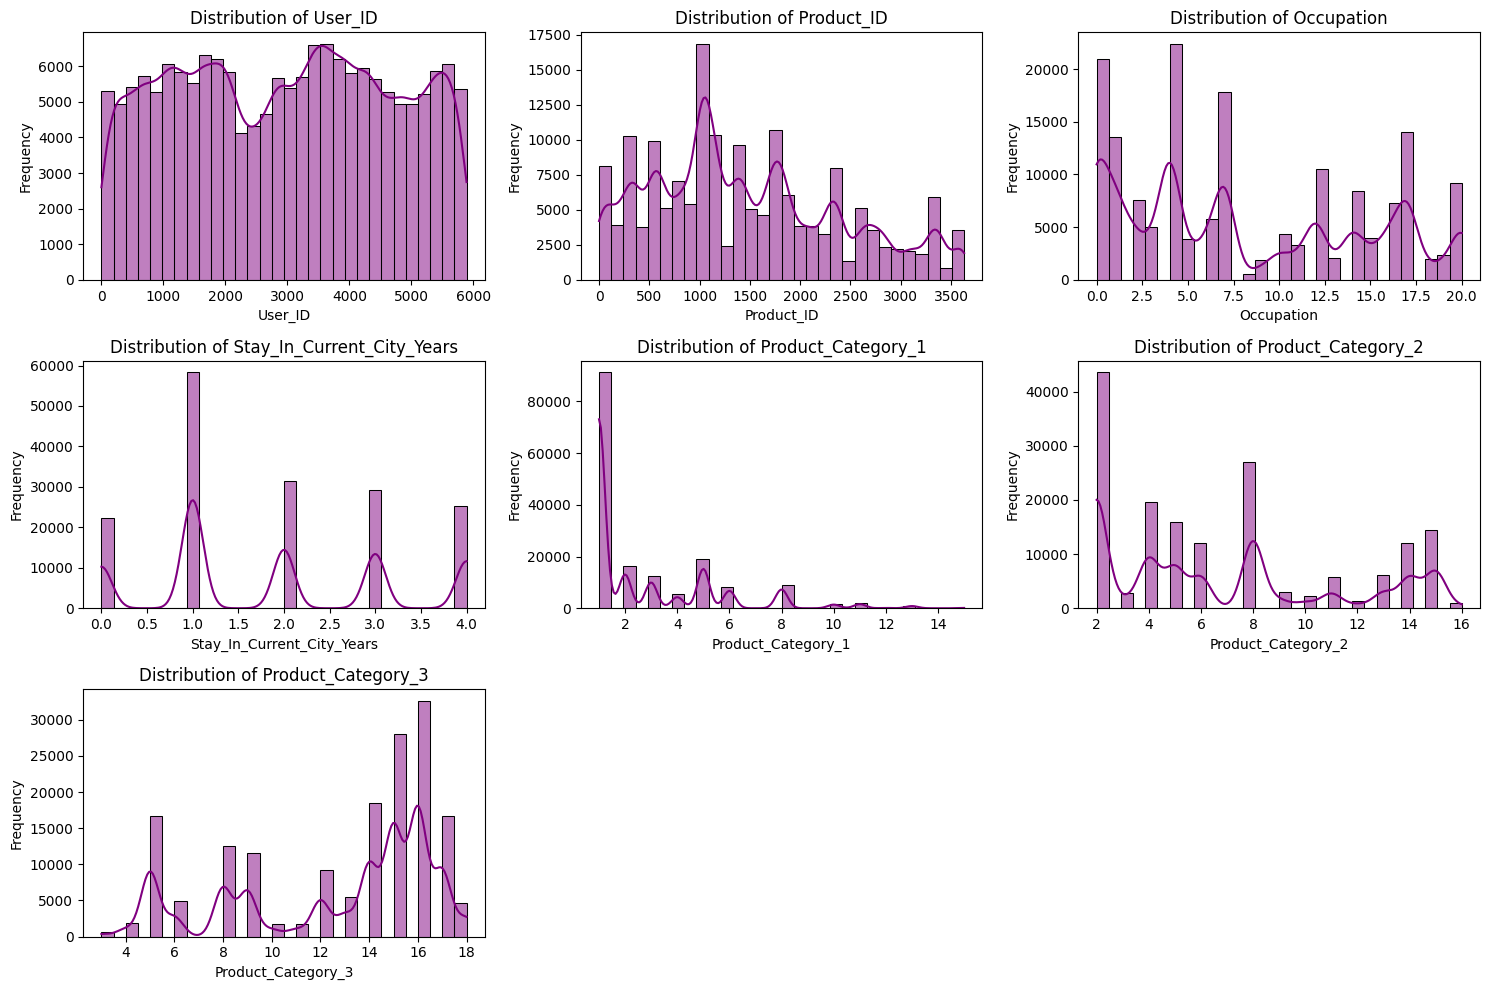

In [125]:
# Visualize the distribution of key numerical features.
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, color='purple', bins=30)
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()

In [126]:
# Summary statistics for numerical columns
summary_stats = df[numerical_columns].describe().T
print(summary_stats)

                               count         mean          std  min     25%  \
User_ID                     166821.0  2956.922258  1690.553079  0.0  1478.0   
Product_ID                  166821.0  1471.491683   942.668323  0.0   745.0   
Occupation                  166821.0     8.178886     6.487522  0.0     2.0   
Stay_In_Current_City_Years  166821.0     1.861690     1.284791  0.0     1.0   
Product_Category_1          166821.0     2.742766     2.573969  1.0     1.0   
Product_Category_2          166821.0     6.896871     4.500288  2.0     2.0   
Product_Category_3          166821.0    12.668243     4.125338  3.0     9.0   

                               50%     75%     max  
User_ID                     3019.0  4367.0  5890.0  
Product_ID                  1334.0  2106.0  3630.0  
Occupation                     7.0    14.0    20.0  
Stay_In_Current_City_Years     2.0     3.0     4.0  
Product_Category_1             1.0     4.0    15.0  
Product_Category_2             6.0    10.0    16.

In [127]:
 

# Adding Median (50th percentile), 1st Quartile (25th percentile), and 3rd Quartile (75th percentile) manually
summary_stats['Median'] = df[numerical_columns].median()
summary_stats['Variance'] = df[numerical_columns].var()
summary_stats['Standard Deviation'] = df[numerical_columns].std()

# Reordering columns to match the required format
summary_stats = summary_stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'Variance', 'Standard Deviation']]

summary_stats


,mean,std,min,25%,50%,75%,max,Variance,Standard Deviation
User_ID,2956.922258,1690.553079,0.0,1478.0,3019.0,4367.0,5890.0,2.857970e+06,1690.553079
Product_ID,1471.491683,942.668323,0.0,745.0,1334.0,2106.0,3630.0,8.886236e+05,942.668323
Occupation,8.178886,6.487522,0.0,2.0,7.0,14.0,20.0,4.208794e+01,6.487522
Stay_In_Current_City_Years,1.861690,1.284791,0.0,1.0,2.0,3.0,4.0,1.650688e+00,1.284791
Product_Category_1,2.742766,2.573969,1.0,1.0,1.0,4.0,15.0,6.625318e+00,2.573969
Product_Category_2,6.896871,4.500288,2.0,2.0,6.0,10.0,16.0,2.025259e+01,4.500288
Product_Category_3,12.668243,4.125338,3.0,9.0,14.0,16.0,18.0,1.701841e+01,4.125338


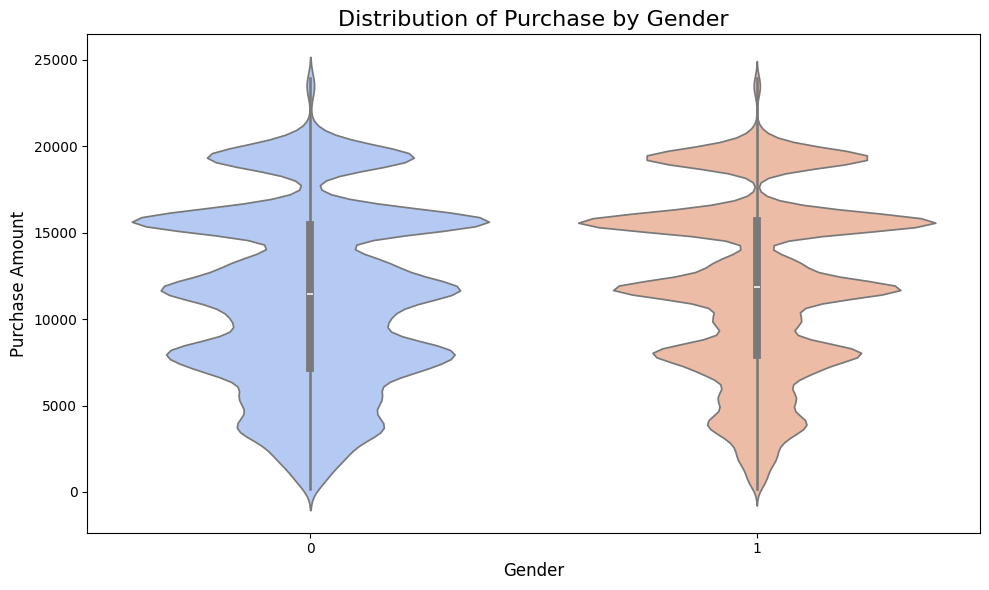

In [128]:
# Violin plot to show the distribution of 'Purchase' by 'Gender'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Purchase', data=df, palette='coolwarm')
plt.title("Distribution of Purchase by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Purchase Amount", fontsize=12)
plt.tight_layout()
plt.show()


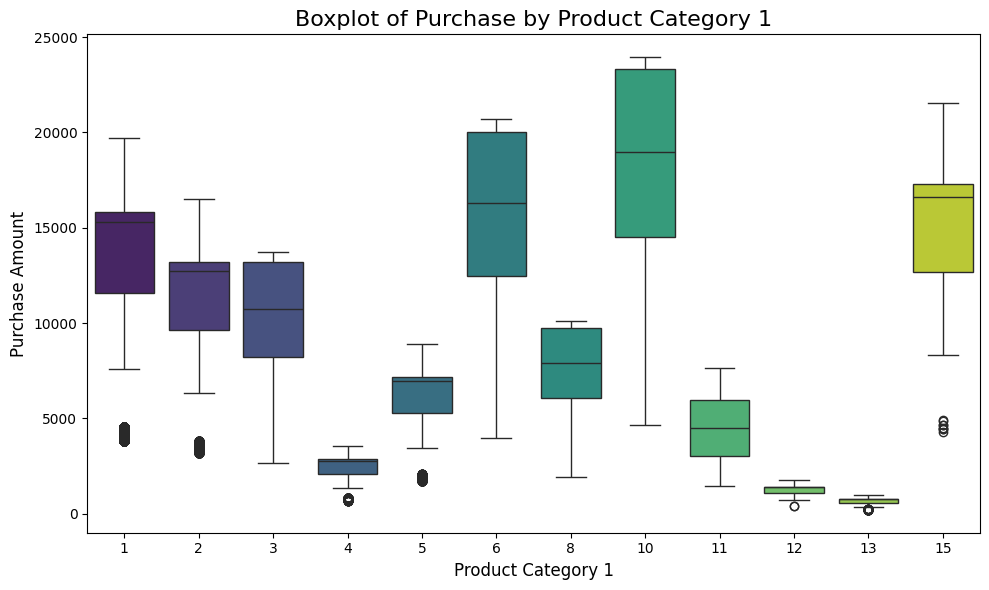

In [129]:
# Boxplot for product category 1
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product_Category_1', y='Purchase', palette='viridis')
plt.title("Boxplot of Purchase by Product Category 1", fontsize=16)
plt.xlabel("Product Category 1", fontsize=12)
plt.ylabel("Purchase Amount", fontsize=12)
plt.tight_layout()
plt.show()


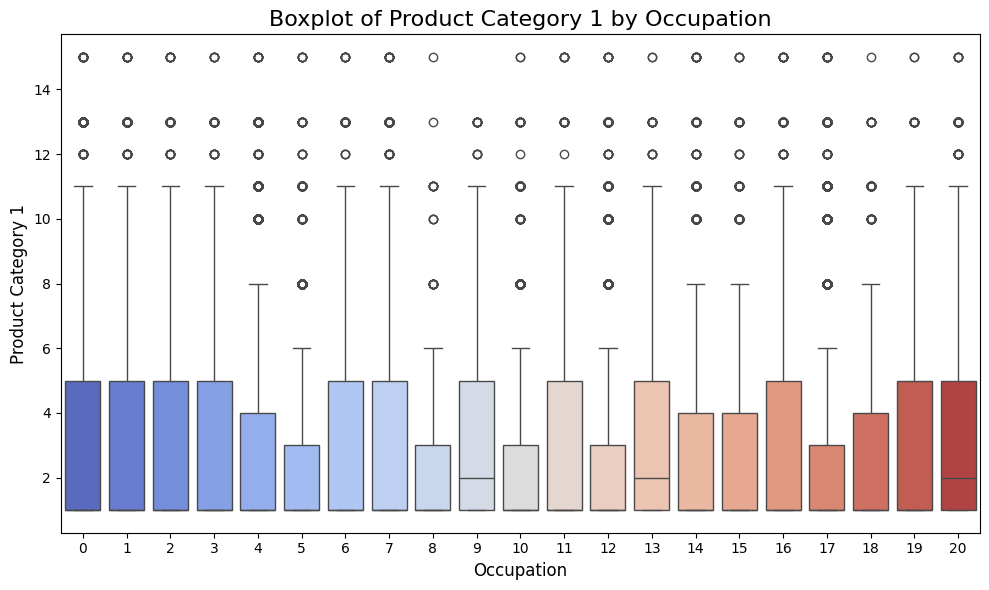

In [130]:

# Boxplot for occupation vs product category 1
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Occupation', y='Product_Category_1', palette='coolwarm')
plt.title("Boxplot of Product Category 1 by Occupation", fontsize=16)
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Product Category 1", fontsize=12)
plt.tight_layout()
plt.show()


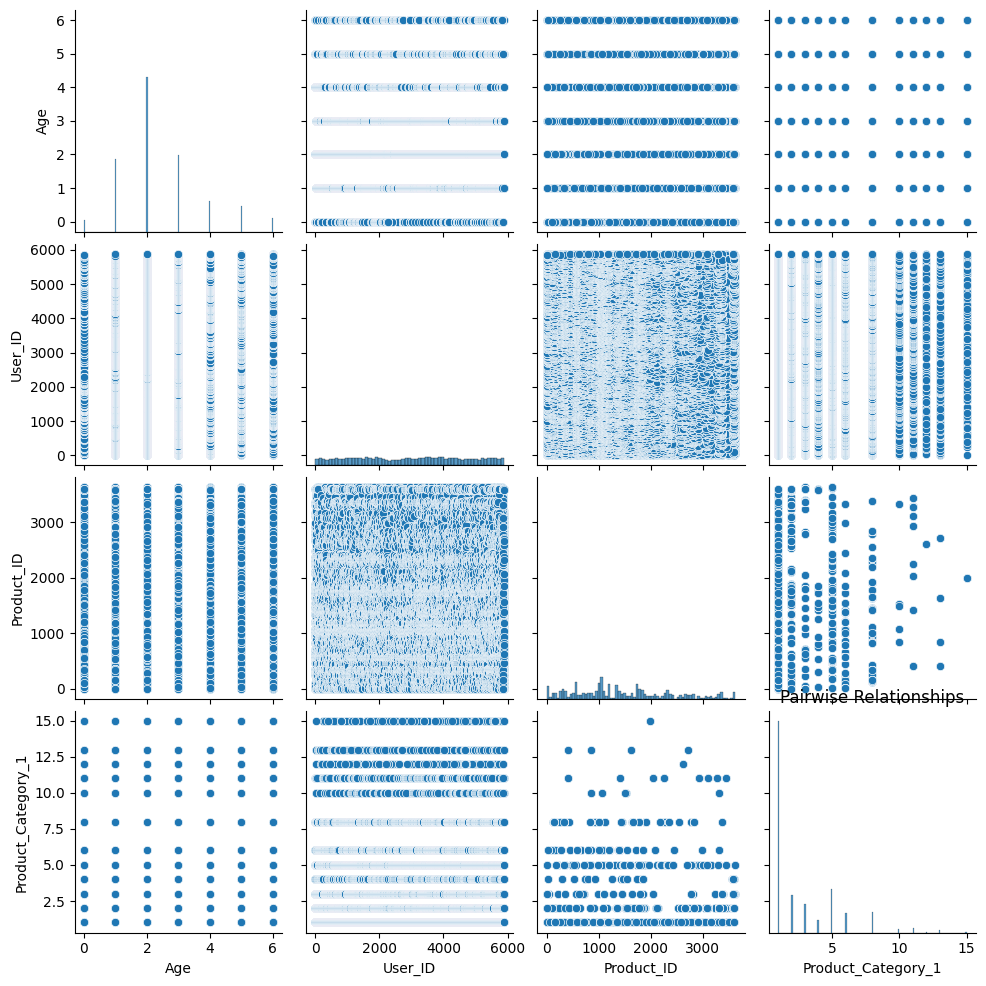

In [131]:
sns.pairplot(df[['Age', 'User_ID', 'Product_ID', 'Product_Category_1']])
plt.title("Pairwise Relationships")
plt.show()


# Statistical Analysis

### One Sample Test For Mean
let's Suppose, it was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?

In [132]:
#null hypothesis - The mean is 10000
#alternate hypothesis - The mean is not 10000

In [133]:
new_data = df.loc[(df['Age'] == 1) & df['Gender'] == 1]

In [134]:
new_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
98,21,3370,1,1,15,0,4,0,1,8.0,17.0,12099
103,21,2507,1,1,15,0,4,0,1,11.0,16.0,12098
111,21,2150,1,1,15,0,4,0,2,4.0,15.0,9564
127,24,1957,1,1,4,2,4,0,1,5.0,9.0,15361
128,24,458,1,1,4,2,4,0,1,2.0,15.0,15770
...,...,...,...,...,...,...,...,...,...,...,...,...
545425,5814,338,1,1,5,1,1,0,1,14.0,16.0,15420
545427,5814,1832,1,1,5,1,1,0,2,3.0,4.0,15973
545428,5814,1518,1,1,5,1,1,0,2,15.0,16.0,6847
545430,5814,1538,1,1,5,1,1,0,2,4.0,5.0,13276


In [135]:
new_data.shape

(24239, 12)

In [136]:
sample_size = 1000
sample = new_data.sample(sample_size, random_state=0)

In [137]:
sample.shape

(1000, 12)

In [138]:
new_data.mean()

User_ID                        2687.058377
Product_ID                     1427.861587
Gender                            1.000000
Age                               1.000000
Occupation                        7.085193
City_Category                     1.064483
Stay_In_Current_City_Years        1.857172
Marital_Status                    0.195016
Product_Category_1                2.477124
Product_Category_2                6.571847
Product_Category_3               12.471760
Purchase                      11852.847518
dtype: float64

In [139]:
pos_mean = 11852

In [140]:
sample_mean = sample['Purchase'].mean()
print(sample_mean)

11806.467


In [141]:
t_stat, p_value = ttest_1samp(sample['Purchase'], pos_mean)
print(t_stat, p_value)

-0.2826842625898287 0.7774774400634757


- P-value is less than 0.05, reject the null hypothesis.
- Null Hypothesis will be accepted
- Therefore, the mean purchase for men aged 18-25 is 10000.

### One Sample Test for Proportion
Let's Suppose, It was observed that the percentage of women that spend more than 10000 was 35%. Is it still the same?

In [142]:
#null hypothesis - proportion is 35%.
#alternate hypothesis - proportion is not 35%.

data_new = df.loc[(df['Purchase'] > 10000)]

In [143]:
data_new.shape

(102477, 12)

In [144]:
data_new['Gender'].value_counts()

Gender
1    81353
0    21124
Name: count, dtype: int64

In [145]:
#No of women in the sample
count = data_new['Gender'].value_counts()[0]

In [146]:
count

21124

In [147]:
#hypothesised value
p0 = 0.35

In [148]:
#number of observations
nobs = len(data_new['Gender'])
nobs

102477

In [149]:
data_new['Gender'].value_counts()[0]/nobs

0.2061340593499029

In [150]:
z_stat, p_val = proportions_ztest(count=count,
                                  nobs=nobs,
                                  value=p0,
                                  alternative="two-sided",
                                  prop_var=False)
print(z_stat, p_val)

-113.84729816907917 0.0


- p-value is less than 0.05, reject the null hypothesis.
- the proportion of women spending more than 10000, is not 35%.

### Two Sample test for Means
Is the average purchase made by men and women of the age 18-25 same?
##### 1. By performing t test, where we can compare means of both the groups
##### 2. By performing f test, where we can compare variances of both the groups

In [151]:
data_men = df[df['Gender'] == 1]
data_women = df[df['Gender'] == 0]

data_men_sample = data_men.sample(500, random_state=0)
data_women_sample = data_women.sample(500, random_state=0)

In [152]:
data_men_sample.shape

(500, 12)

In [153]:
data_women_sample.shape

(500, 12)

In [154]:
#checking variances of the two samples
print(data_men_sample.Purchase.var())
print(data_women_sample.Purchase.var())

25013543.515286572
27687134.28477355


In [155]:
#sample means
print(data_men_sample.Purchase.mean())
print(data_women_sample.Purchase.mean())

11856.912
10510.286


In [156]:


t_stat_2, p_val_2 = ttest_ind(data_men_sample.Purchase, data_women_sample.Purchase, equal_var=False)
print(t_stat_2, p_val_2)

4.147858162395001 3.6423996346310354e-05


- We can reject the null hypothesis using the test statistic and since p-value is less than 0.05.
- The average purchases are not the same.

### Two Sample test for Proportion
##### Is the percentage of men who have spend more than 10000 same for the ages 18-25 and 26-35 ?

In [157]:
#null hypothesis - Percentage of the men in the age groups is same
#alternate hypothesis - Percentage of the men in the age groups is not same

data_age1 = df.loc[(df['Age'] == 1) & (df['Purchase'] > 10000)]
data_age2 = df.loc[(df['Age'] == 2) & (df['Purchase'] > 10000)]

In [158]:
len(data_age1), len(data_age2)

(19262, 40994)

In [159]:
data_age1_sample = data_age1.sample(1000, random_state=0)
data_age2_sample = data_age2.sample(1000, random_state=0)

In [160]:
count = [(data_age1_sample['Gender'] == 1).sum(), (data_age2_sample['Gender'] == 1).sum()]

nobs = [(len(data_age1_sample)), len(data_age2_sample)]

In [161]:
count
nobs

[1000, 1000]

In [162]:
stat_2sample, p_value_2sample = proportions_ztest(count=count,
                                                  nobs=nobs,
                                                  value=0,
                                                  alternative='two-sided',
                                                  prop_var=False)

In [163]:
print(stat_2sample, p_value_2sample)

-1.5165009817767297 0.12939272225896914


- p value is more than 0.05, cannot reject the null hypthesis.
- Null hypothesis is accepted
- Therefore, Percentage of the men in  both the age groups who have spent more than 10000 is same

### ANOVA (Analysis of Variance):
##### One-Way ANOVA: Is there a significant difference in the average purchase across different age groups?

- Purpose: We want to test if the average purchase amount differs significantly between different age groups (e.g., 18-25, 26-35, 36-45, etc.).



In [164]:

df=pd.read_csv(r"/home/adarsh/Downloads/train.csv")
df=df.dropna()
# Subset data for different age groups
age_group_18_25 = df[df['Age'] == '18-25']['Purchase']
age_group_26_35 = df[df['Age'] == '26-35']['Purchase']
age_group_36_45 = df[df['Age'] == '36-45']['Purchase']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(age_group_18_25, age_group_26_35, age_group_36_45)

# Output the result
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in purchase amounts across age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in purchase amounts across age groups.")


F-statistic: 8.216645001666345, P-value: 0.0002702584615701958
Reject the null hypothesis: There is a significant difference in purchase amounts across age groups.


##### 2. Two-Way ANOVA: Does age and gender together affect the average purchase amount?

- Purpose: We want to examine if the interaction between age and gender has an effect on the average purchase amount.

In [165]:

# Fit the model: 'Purchase ~ Age * Gender' tests for the interaction effect
model = ols('Purchase ~ C(Age) * C(Gender)', data=df).fit()

# Perform two-way ANOVA
anova_result = anova_lm(model)

 
print(anova_result)

 
if anova_result['PR(>F)'][0] < 0.05:
    print("Reject the null hypothesis: Age and Gender together significantly affect purchase behavior.")
else:
    print("Fail to reject the null hypothesis: Age and Gender together do not significantly affect purchase behavior.")


                        df        sum_sq       mean_sq           F  \
C(Age)                 6.0  3.479961e+09  5.799934e+08   22.562266   
C(Gender)              1.0  1.580654e+10  1.580654e+10  614.888762   
C(Age):C(Gender)       6.0  1.617398e+09  2.695663e+08   10.486373   
Residual          166807.0  4.287998e+12  2.570635e+07         NaN   

                         PR(>F)  
C(Age)             9.728318e-27  
C(Gender)         1.705025e-135  
C(Age):C(Gender)   1.152915e-11  
Residual                    NaN  
Reject the null hypothesis: Age and Gender together significantly affect purchase behavior.


##### 3. Post-Hoc Analysis (if One-Way ANOVA is significant): Which specific age groups differ in purchase behavior?

- Purpose: If the One-Way ANOVA shows significant differences, we can perform post-hoc testing to determine which specific age groups differ from each other.

In [166]:


# Perform post-hoc analysis using Tukey's HSD test
tukey_result = pairwise_tukeyhsd(df['Purchase'], df['Age'], alpha=0.05)

# Output the result
print(tukey_result)

# Interpretation
print("Post-hoc results: Age groups that show significant differences in purchase amounts.")


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
  0-17  18-25  408.4998    0.0  177.8393  639.1603   True
  0-17  26-35  439.8894    0.0  217.6473  662.1314   True
  0-17  36-45  557.0057    0.0  327.2657  786.7457   True
  0-17  46-50  491.6193    0.0  240.9893  742.2493   True
  0-17  51-55  863.1456    0.0  605.9829 1120.3082   True
  0-17    55+  689.1659    0.0  398.8334  979.4985   True
 18-25  26-35   31.3895 0.9723  -71.1562  133.9353  False
 18-25  36-45  148.5059 0.0039   30.5883  266.4234   True
 18-25  46-50   83.1195 0.6928  -71.6045  237.8435  False
 18-25  51-55  454.6458    0.0  289.5497  619.7418   True
 18-25    55+  280.6661  0.002   67.5532  493.7789   True
 26-35  36-45  117.1163 0.0105   16.6582  217.5744   True
 26-35  46-50     51.73 0.9355   -90.139  193.5989  False
 26-35  51-55  423.2562    0.0  270.1419  576.3706   True
 26-35    55+ 

##### 4. Analysis of Purchase Behavior by Gender (Two-Sample t-test)

- Question: Is the average purchase amount of men and women significantly different?

- Approach: Use a Two-Sample t-test to compare the mean purchases between men and women.

In [167]:
# Subset data for Men and Women
men_purchase = df[df['Gender'] == 'M']['Purchase']
women_purchase = df[df['Gender'] == 'F']['Purchase']

# Perform Two-Sample t-test
t_stat, p_value = ttest_ind(men_purchase, women_purchase)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The average purchase amount between men and women is significantly different.")
else:
    print("Fail to reject the null hypothesis: The average purchase amount between men and women is not significantly different.")


T-statistic: 24.90026853101756, P-value: 1.3154208559980494e-136
Reject the null hypothesis: The average purchase amount between men and women is significantly different.


##### 5. Comparison of Purchase Behavior Between Different Product Categories (Chi-Square Test)

- Question: Is there a significant difference in the distribution of purchase behavior across product categories?

- Approach: Use the Chi-Square Test for Independence to assess if purchase behavior depends on the product category.

In [168]:

# Create a contingency table between product categories and purchase behavior
purchase_category_table = pd.crosstab(df['Product_Category_1'], df['Purchase'] > 10000)

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(purchase_category_table)

print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in purchase behavior across product categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in purchase behavior across product categories.")


Chi-Square Statistic: 75893.73266042382, P-value: 0.0
Reject the null hypothesis: There is a significant difference in purchase behavior across product categories.


##### 6.Analysis of Purchase Behavior Based on Marital Status (T-test or ANOVA)

- Question: Does marital status affect the average purchase amount?

- Approach: You can use a Two-Sample T-test or One-Way ANOVA depending on whether you have two categories (e.g., Married and Single) or more.

In [169]:
married_purchase = df[df['Marital_Status'] == 0]['Purchase']
single_purchase = df[df['Marital_Status'] == 1]['Purchase']

# Perform Two-Sample t-test
t_stat, p_value = ttest_ind(married_purchase, single_purchase)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The average purchase amount differs between married and single individuals.")
else:
    print("Fail to reject the null hypothesis: The average purchase amount does not differ between married and single individuals.")


T-statistic: -1.8802276290918822, P-value: 0.060078802553508885
Fail to reject the null hypothesis: The average purchase amount does not differ between married and single individuals.


##### 7. Analysis of Purchase Frequency Based on Occupation (Chi-Square Test)

- Question: Is there a significant relationship between occupation and purchase frequency?

- Approach: Use a Chi-Square Test to assess if occupation influences purchase frequency

In [170]:
# Create a contingency table between occupation and purchase frequency
occupation_purchase_table = pd.crosstab(df['Occupation'], df['Purchase'] > 10000)

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(occupation_purchase_table)

print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Occupation significantly influences purchase frequency.")
else:
    print("Fail to reject the null hypothesis: Occupation does not significantly influence purchase frequency.")


Chi-Square Statistic: 695.4329640791744, P-value: 2.0477179090967146e-134
Reject the null hypothesis: Occupation significantly influences purchase frequency.


##### Descriptive Statistics for Purchases

- Question: What are the central tendencies (mean, median) and dispersions (variance, standard deviation) for purchase amounts in different groups (e.g., men, women, age groups)?
- Analysis:
        Calculate the mean, median, standard deviation, and variance for the purchase amounts across gender, age, and other categories.
        Visualize the distributions using box plots, histograms, or bar plots

           count          mean          std    min     25%      50%      75%  \
Gender                                                                         
F        37594.0  11084.723786  5071.057710  185.0  7144.0  11428.0  15467.0   
M       129227.0  11824.922756  5073.415975  185.0  7942.0  11829.0  15661.0   

            max  
Gender           
F       23932.0  
M       23959.0  


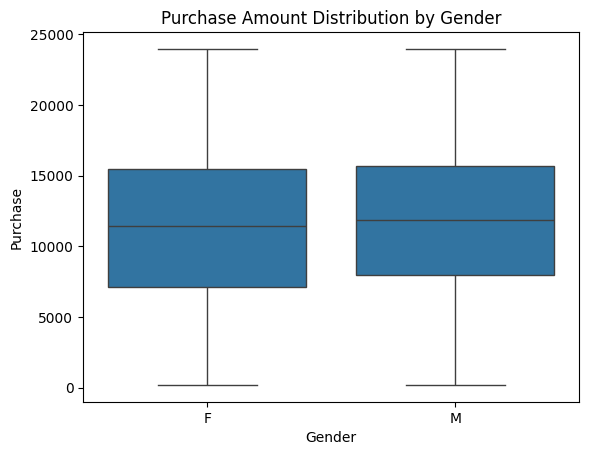

In [171]:
# Descriptive statistics for purchases by gender
descriptive_stats = df.groupby('Gender')['Purchase'].describe()
print(descriptive_stats)
 
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title('Purchase Amount Distribution by Gender')
plt.show()


##### Purchase Behavior by Age Group

- Question: Are there significant differences in average purchase amounts across different age groups?
- Analysis:
        Use ANOVA to test if the means of purchase amounts differ across multiple age groups.
        Visualize with a bar plot or box plot.

F-statistic: 22.471900532150098, P-value: 1.2654555612294477e-26


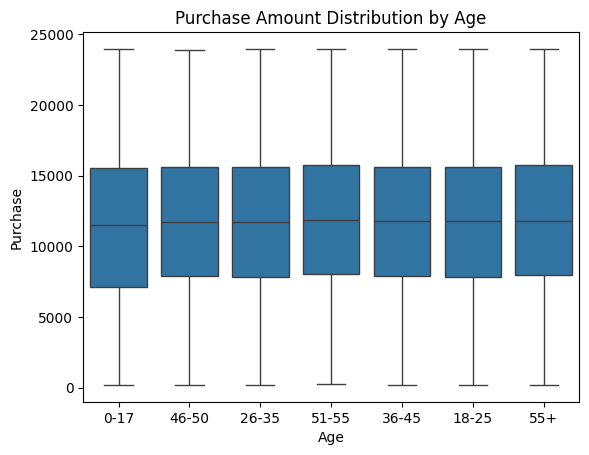

In [172]:
  
age_groups = df['Age'].unique()
purchases_by_age = [df[df['Age'] == age]['Purchase'] for age in age_groups]

# ANOVA test
f_stat, p_value = f_oneway(*purchases_by_age)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Visualization
sns.boxplot(x='Age', y='Purchase', data=df)
plt.title('Purchase Amount Distribution by Age')
plt.show()


##### Chi-Square Test for Categorical Data
- Question: Is there an association between gender and other categorical variables (e.g., marital status, city category)?
- Analysis:
        Use Chi-square tests to assess the relationship between gender and other categorical variables

In [173]:

# Contingency table for gender vs marital status
contingency_table = pd.crosstab(df['Gender'], df['Marital_Status'])

 
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2_stat}, P-value: {p_value}")

 

Chi2 Statistic: 19.665534005572802, P-value: 9.225030652690436e-06


- Statistical Significance: The p-value of 9.23e-06 is significantly smaller than 0.05, which means that there is a statistically significant association between the two categorical variables you are testing (likely gender and purchase behavior).
- Rejecting the Null Hypothesis: Based on the p-value, we reject the null hypothesis and conclude that the variables are related, i.e., gender and purchase behavior are not independent of each other.